<a href="https://colab.research.google.com/github/Mahanteshvn/ML_LAB/blob/main/Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
import io

print("Please upload your file:")
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

  # To read the content of the file, you can do:
  # Assuming it's a text file, you can decode it
  content = uploaded[filename].decode('utf-8')
  print(f'\n--- Content of {filename} ---\n')


  # If it's a CSV or other structured data, you might want to use pandas:
  # import pandas as pd
  # df = pd.read_csv(io.StringIO(content))
  # print(df.head())

Please upload your file:


Saving housing.csv to housing (1).csv
Uploaded file "housing (1).csv" with length 1423529 bytes

--- Content of housing (1).csv ---



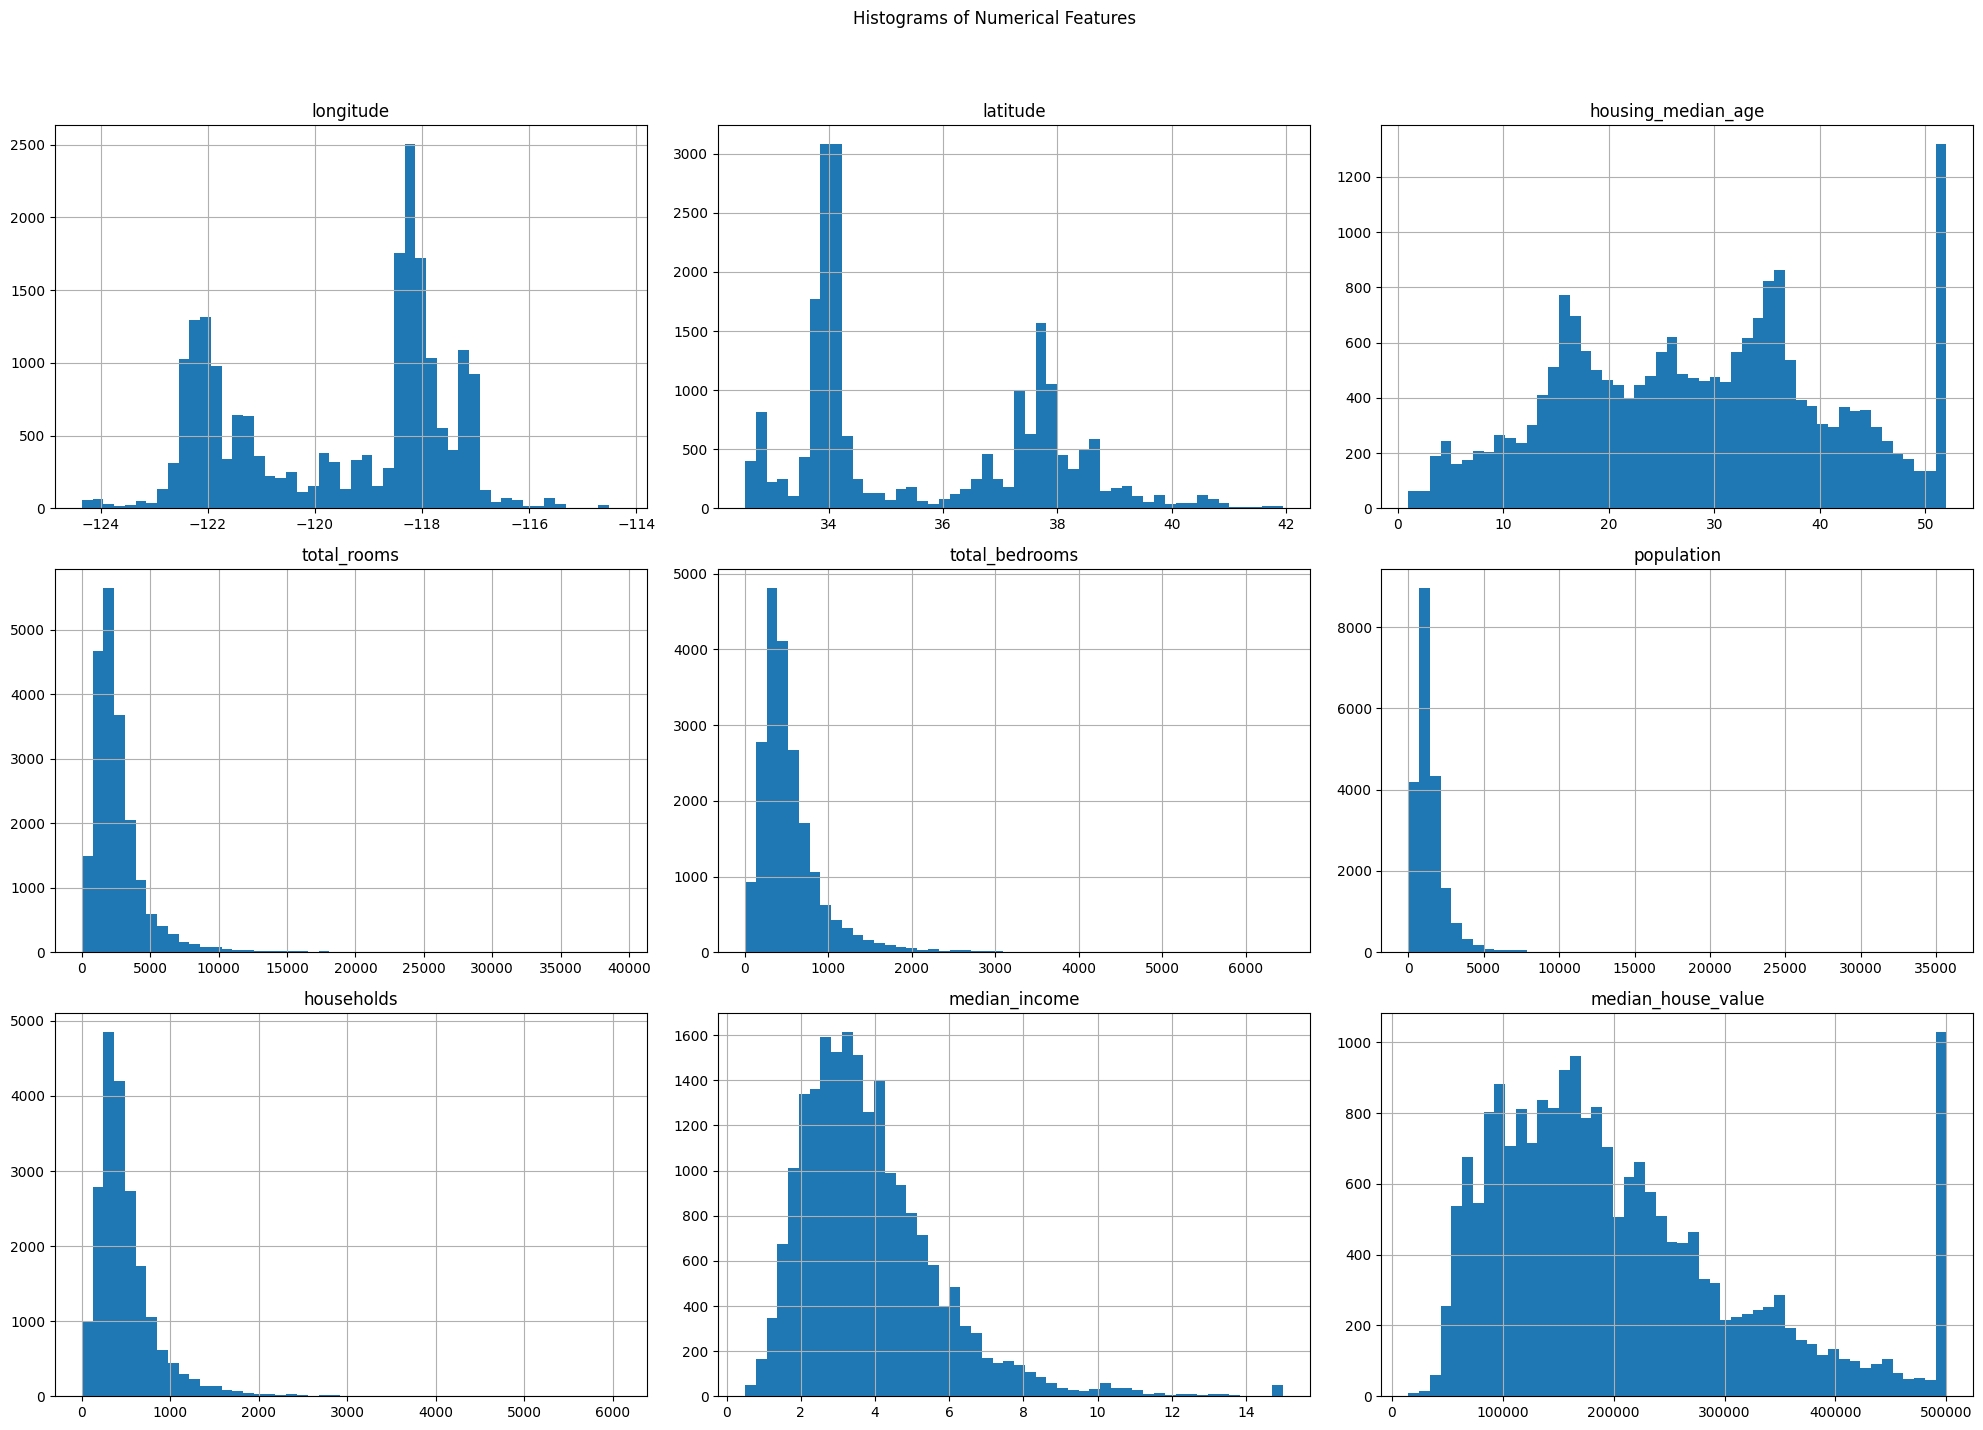


--- Interpretation of Histograms ---

1. Median Income (median_income):
   The histogram for `median_income` typically shows a long tail to the right, indicating that most districts have lower median incomes, but there are a few districts with significantly higher median incomes. It often appears capped at a certain value, which might be due to data preprocessing or a real-world upper limit.

2. Housing Median Age (housing_median_age):
   The histogram for `housing_median_age` often shows a concentration of houses in older age brackets, with some peaks at certain ages. It can also show a cap, meaning that for very old houses, the age might be recorded as a maximum value. This indicates the distribution of the age of houses across the districts.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Assuming 'content' variable holds the CSV data from the previous cell
df = pd.read_csv(io.StringIO(content))

# Get numerical features for plotting histograms
numerical_features = df.select_dtypes(include=['number']).columns

# Plot histograms for each numerical feature
df[numerical_features].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print("\n--- Interpretation of Histograms ---")
print("\n1. Median Income (median_income):")
print("   The histogram for `median_income` typically shows a long tail to the right, indicating that most districts have lower median incomes, but there are a few districts with significantly higher median incomes. It often appears capped at a certain value, which might be due to data preprocessing or a real-world upper limit.")
print("\n2. Housing Median Age (housing_median_age):")
print("   The histogram for `housing_median_age` often shows a concentration of houses in older age brackets, with some peaks at certain ages. It can also show a cap, meaning that for very old houses, the age might be recorded as a maximum value. This indicates the distribution of the age of houses across the districts.")

The feature with the maximum absolute correlation with 'median_house_value' is 'median_income' with a correlation of 0.69.


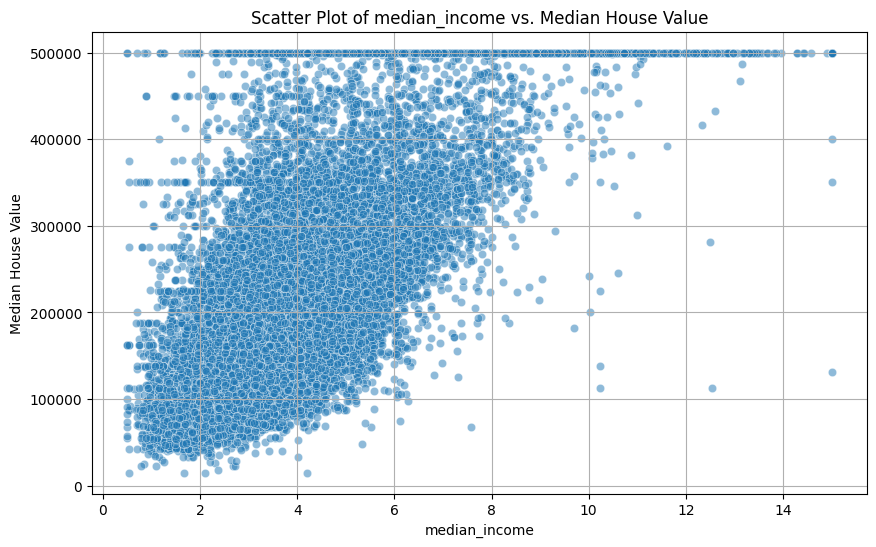


--- Analysis of the graph --- 
The scatter plot shows a strong positive correlation between `median_income` and `median_house_value`. As `median_income` increases, `median_house_value` tends to increase significantly. There might be some capping visible at higher `median_house_value` values, indicating a potential data cleaning artifact or a real-world saturation point.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlations with 'median_house_value'
correlations = numerical_df.corr()['median_house_value'].sort_values(ascending=False)

# Exclude 'median_house_value' itself from the correlations to find the next highest
# Check if 'median_house_value' is in the index before dropping it
if 'median_house_value' in correlations.index:
    correlations = correlations.drop('median_house_value')

# Find the feature with the maximum absolute correlation
most_correlated_feature = correlations.abs().idxmax()
max_correlation_value = correlations[most_correlated_feature]

print(f"The feature with the maximum absolute correlation with 'median_house_value' is '{most_correlated_feature}' with a correlation of {max_correlation_value:.2f}.")

# Plot the scatter graph for the most correlated feature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=most_correlated_feature, y='median_house_value', alpha=0.5)
plt.title(f'Scatter Plot of {most_correlated_feature} vs. Median House Value')
plt.xlabel(most_correlated_feature)
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

print("\n--- Analysis of the graph --- ")
if most_correlated_feature == 'median_income':
    print(f"The scatter plot shows a strong positive correlation between `median_income` and `median_house_value`. As `median_income` increases, `median_house_value` tends to increase significantly. There might be some capping visible at higher `median_house_value` values, indicating a potential data cleaning artifact or a real-world saturation point.")
elif most_correlated_feature == 'total_rooms' or most_correlated_feature == 'population' or most_correlated_feature == 'households':
    print(f"For `{most_correlated_feature}`, the scatter plot indicates a positive correlation with `median_house_value`, though likely less strong than `median_income`. Larger values of `{most_correlated_feature}` generally correspond to higher housing values, but the spread might be wide, suggesting other factors are also highly influential. It's common for these features to show a more dispersed pattern, as total numbers can be high in both expensive and less expensive areas depending on density and other characteristics.")
elif most_correlated_feature == 'housing_median_age':
    print(f"The correlation with `housing_median_age` is likely negative or weak. The scatter plot for `housing_median_age` vs. `median_house_value` typically shows a more scattered pattern, indicating that while there might be some trend (e.g., newer houses being more expensive in some areas, or very old, well-maintained houses being expensive in others), it's not a straightforward linear relationship. Often, very old or very new houses can command high prices, while middle-aged houses might be less valuable.")
elif most_correlated_feature == 'latitude' or most_correlated_feature == 'longitude':
    print(f"The scatter plot for `{most_correlated_feature}` vs. `median_house_value` will likely show clusters or patterns related to geographical location. For example, specific latitudes or longitudes corresponding to coastal areas or urban centers might show higher median house values. The relationship isn't simply linear but rather reflects spatial trends.")
else:
    print(f"The scatter plot for '{most_correlated_feature}' against 'median_house_value' generally shows a {('positive' if max_correlation_value > 0 else 'negative')} relationship. This means that as the value of '{most_correlated_feature}' increases, the 'median_house_value' tends to {('increase' if max_correlation_value > 0 else 'decrease')}. The tightness of the points around a potential trend line indicates the strength of this relationship; a tighter cluster suggests a stronger correlation. Any discernible patterns or outliers could reveal specific market behaviors or data characteristics.")

The geographical features in the dataset are: longitude, latitude


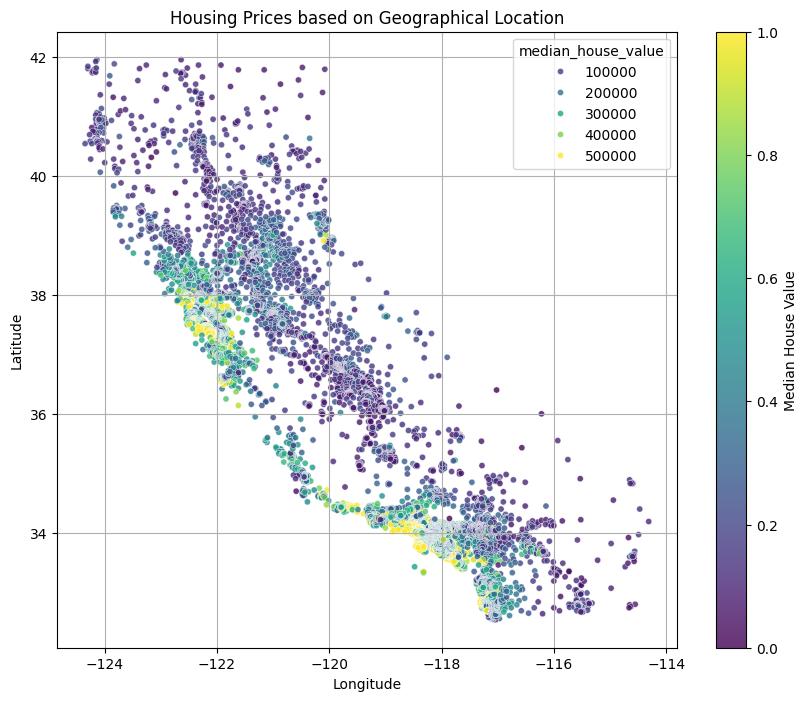


--- Interpretation of Geographical Data ---
This scatter plot visualizes the distribution of median house values across different geographical locations (longitude and latitude).
Observations:
1. Density of Points: Areas with a higher concentration of points represent more housing districts.
2. Color Gradient: The color gradient (e.g., from purple to yellow in 'viridis' palette) indicates varying median house values. Darker/cooler colors often represent lower values, while brighter/warm colors indicate higher values.
3. Spatial Patterns: We can observe clusters of high or low median house values. For instance:
   - Coastal areas or regions closer to the ocean (often western longitudes in California) tend to show higher median house values (brighter colors).
   - Urban centers or areas with higher population density might also show elevated house prices.
   - Conversely, more inland or rural areas might have lower median house values.
This plot helps in identifying hot spots and cold s

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Geographical features are typically 'longitude' and 'latitude'
geographical_features = ['longitude', 'latitude']
print(f"The geographical features in the dataset are: {', '.join(geographical_features)}")

plt.figure(figsize=(10, 8))
# Capture the Axes object returned by scatterplot
scatter_plot_obj = sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value',
                palette='viridis', s=20, alpha=0.8)
plt.title('Housing Prices based on Geographical Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Explicitly pass the mappable from the scatterplot to colorbar
# The mappable is usually the first element in the collections list of the Axes object
plt.colorbar(scatter_plot_obj.collections[0], label='Median House Value')
plt.grid(True)
plt.show()

print("\n--- Interpretation of Geographical Data ---")
print("This scatter plot visualizes the distribution of median house values across different geographical locations (longitude and latitude).")
print("Observations:")
print("1. Density of Points: Areas with a higher concentration of points represent more housing districts.")
print("2. Color Gradient: The color gradient (e.g., from purple to yellow in 'viridis' palette) indicates varying median house values. Darker/cooler colors often represent lower values, while brighter/warm colors indicate higher values.")
print("3. Spatial Patterns: We can observe clusters of high or low median house values. For instance:")
print("   - Coastal areas or regions closer to the ocean (often western longitudes in California) tend to show higher median house values (brighter colors).")
print("   - Urban centers or areas with higher population density might also show elevated house prices.")
print("   - Conversely, more inland or rural areas might have lower median house values.")
print("This plot helps in identifying hot spots and cold spots for housing prices, suggesting a strong geographical influence on property values.")

In [16]:
import pandas as pd
import numpy as np

# Assuming 'df' is the DataFrame from previous steps
print("--- Data Cleaning Process ---")

# 1. Inspect for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print(missing_values.sort_values(ascending=False))
    # Example of handling missing values for 'total_bedrooms' using median imputation
    # (This is already part of the numerical pipeline in the previous cell, but shown here for demonstration)
    if 'total_bedrooms' in df.columns and df['total_bedrooms'].isnull().any():
        median_bedrooms = df['total_bedrooms'].median()
        df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms) # Fixed: Avoid inplace=True
        print(f"\nFilled missing 'total_bedrooms' with median value: {median_bedrooms}")
        print("Number of missing 'total_bedrooms' after imputation:", df['total_bedrooms'].isnull().sum())
else:
    print("No missing values found in the dataset.")

# 2. Inspect for duplicate rows
print("\nChecking for duplicate rows:")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"{duplicate_rows} duplicate rows found. Dropping duplicates...")
    df.drop_duplicates(inplace=True)
    print(f"DataFrame shape after dropping duplicates: {df.shape}")
else:
    print("No duplicate rows found.")

# 3. Data type consistency (example for 'ocean_proximity' if not already handled)
print("\nChecking 'ocean_proximity' unique values and type:")
if 'ocean_proximity' in df.columns:
    print("Unique values for 'ocean_proximity':", df['ocean_proximity'].unique())
    print("Data type of 'ocean_proximity':", df['ocean_proximity'].dtype)

print("\n--- Cleaning process demonstration complete ---")
print("Note: The full preprocessing pipeline in cell 'YYOSKw3il0Za' already handles imputation and categorical encoding more comprehensively.")

--- Data Cleaning Process ---

Checking for missing values:
No missing values found in the dataset.

Checking for duplicate rows:
No duplicate rows found.

Checking 'ocean_proximity' unique values and type:
Unique values for 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Data type of 'ocean_proximity': object

--- Cleaning process demonstration complete ---
Note: The full preprocessing pipeline in cell 'YYOSKw3il0Za' already handles imputation and categorical encoding more comprehensively.


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

print("--- Handling Categorical Data ---")

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns

if not categorical_features.empty:
    print(f"Categorical features identified: {list(categorical_features)}")
    for feature in categorical_features:
        print(f"\nFeature '{feature}' has unique values: {df[feature].unique()}")
        print(f"Data type: {df[feature].dtype}")

        # Explanation of One-Hot Encoding
        print("\nMethod for conversion: One-Hot Encoding")
        print("One-Hot Encoding is used to convert categorical variables into a numerical format that can be provided to machine learning algorithms. Each unique category is transformed into a new binary feature (0 or 1). This prevents the model from assuming an ordinal relationship between categories where none exists.")

        # Apply One-Hot Encoding
        # Create an instance of OneHotEncoder
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

        # Fit and transform the categorical feature
        feature_encoded = encoder.fit_transform(df[[feature]])

        # Create a DataFrame with the encoded features
        feature_df_encoded = pd.DataFrame(feature_encoded, columns=encoder.get_feature_names_out([feature]))

        print(f"\nOriginal '{feature}' column (first 5 rows):\n{df[feature].head()}")
        print(f"\nOne-Hot Encoded '{feature}' (first 5 rows):\n{feature_df_encoded.head()}")

        # Example of how you would merge this back into the main DataFrame (not modifying original df here)
        # df_processed = pd.concat([df.drop(columns=[feature]), feature_df_encoded], axis=1)

else:
    print("No categorical features found in the dataset.")

print("\n--- Categorical data handling demonstration complete ---")
print("Note: The full preprocessing pipeline in cell 'YYOSKw3il0Za' already handles categorical encoding more comprehensively as part of the overall data preparation.")

--- Handling Categorical Data ---
Categorical features identified: ['ocean_proximity']

Feature 'ocean_proximity' has unique values: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Data type: object

Method for conversion: One-Hot Encoding
One-Hot Encoding is used to convert categorical variables into a numerical format that can be provided to machine learning algorithms. Each unique category is transformed into a new binary feature (0 or 1). This prevents the model from assuming an ordinal relationship between categories where none exists.

Original 'ocean_proximity' column (first 5 rows):
0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

One-Hot Encoded 'ocean_proximity' (first 5 rows):
   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0

In [9]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming 'df' is the DataFrame loaded in previous cells
# Separate features (X) and target (y)
if 'median_house_value' in df.columns:
    X = df.drop("median_house_value", axis=1)
    y = df["median_house_value"]
else:
    print("Error: 'median_house_value' column not found in DataFrame. Assuming all columns are features.")
    X = df.copy()
    y = None # No target specified

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Custom Transformer: Adds combined attributes like rooms_per_household
# This transformer operates on the numerical features array received from the numerical pipeline.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # Nothing to fit for this transformer

    def transform(self, X, y=None):
        # Assuming specific column indices based on numerical_features order:
        # 'total_rooms': index 3, 'total_bedrooms': index 4, 'population': index 5, 'households': index 6
        rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Create numerical pipeline: Imputation, Custom Transform, Scaling
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])

# Create categorical pipeline: One-Hot Encoding
categorical_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
])

# Combine numerical and categorical pipelines using ColumnTransformer
# The numerical_features list must contain the original numerical column names.
# The custom transformer adds new columns, which StandardScaler will handle.
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
])

# Fit and transform the data using the full pipeline
print("Fitting and transforming data with the designed pipeline...")
X_prepared = full_pipeline.fit_transform(X)

print("Pipeline designed successfully!")
print(f"Original features shape: {X.shape}")
print(f"Prepared features shape: {X_prepared.shape}")
print("First 5 rows of prepared data:\n", X_prepared[:5])


Fitting and transforming data with the designed pipeline...
Pipeline designed successfully!
Original features shape: (20640, 9)
Prepared features shape: (20640, 16)
First 5 rows of prepared data:
 [[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  0.62855945 -0.04959654 -1.02998783  0.
   0.          0.          1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  0.32704136 -0.09251223 -0.8888972   0.
   0.          0.          1.          0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.15562047 -0.02584253 -1.29168566  0.
   0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  0.15696608 -0.0503293  -0.4496128   0.
   0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0